# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())


# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
#Create a dataframe to store the data
city_df = pd.DataFrame({"City": cities, "Country": countries, "Latitude": "", "Longitude": "", "Temperature (F)": "", 
                        "Humidity (%)": "", "Wind Speed (mph)": "", "Cloudiness (%)": ""})

city_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
0,shchelyayur,RU,,,,,,
1,lorengau,PG,,,,,,
2,vaini,TO,,,,,,
3,saskylakh,RU,,,,,,
4,rikitea,PF,,,,,,


In [22]:
# keeps count of those cities whose weather information is successfully obtained
city_count = 0

# initializing # of variables
api_call_count = 1 # count for API calls made to OpenWeatherAPI, max 60 counts allowed for free API calls
sets = 0 # counter to count the number of call sets
t0 = time.time() # get current time

# For each city in the dataframe, do the following: 
for index,row in city_df.iterrows():
    city_name = row['City']
    country_id = row['Country']
    
    # create a dictionary to contain the query parameters
    search_parameters = {
        "q": str(city_name)+","+str(country_id),
        "units": "imperial",
        "mode": "json",
        "APPID": weather_api_key
    }
    
    #api call for all Cities 
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    country_info = requests.get(base_url, params = search_parameters).json()
    
    try:
        city_df.loc[index,'Latitude'] = country_info['coord']['lat']
        city_df.loc[index,'Longitude'] = country_info['coord']['lon']
        city_df.loc[index,'Temperature (F)'] = country_info['main']['temp_max']
        city_df.loc[index,'Humidity (%)'] = country_info['main']['humidity']
        city_df.loc[index,'Wind Speed (mph)'] = country_info['wind']['speed']
        city_df.loc[index,'Cloudiness (%)'] = country_info['clouds']['all']

        #print log for each city
        print(f'Processing Record {api_call_count} of Set {sets} | {city_name}' )
        
        city_count = city_count + 1 # only increment if you get all the weather information
    
    except KeyError:
        city_df.loc[index,'Latitude'] = np.nan
        city_df.loc[index,'Longitude'] = np.nan
        city_df.loc[index,'Temperature (F)'] = np.nan
        city_df.loc[index,'Humidity (%)'] = np.nan
        city_df.loc[index,'Cloudiness (%)'] = np.nan
        city_df.loc[index,'Wind Speed (mph)'] = np.nan

        print(f"Missing weather information for city {city_name}")
    api_call_count = api_call_count + 1        
    if api_call_count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1 = time.time()
        api_call_count = 1 # reset it for next 50 calls
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0 = time.time()
print(f"Processing successfully completed. Retrieved weather information for {city_count} cities")


Missing weather information for city named: shchelyayur ...hence skipping
Processing Record 2 of Set 0 | lorengau
Processing Record 3 of Set 0 | vaini
Processing Record 4 of Set 0 | saskylakh
Processing Record 5 of Set 0 | rikitea
Processing Record 6 of Set 0 | hobart
Processing Record 7 of Set 0 | busselton
Processing Record 8 of Set 0 | atar
Processing Record 9 of Set 0 | bredasdorp
Processing Record 10 of Set 0 | new norfolk
Processing Record 11 of Set 0 | prince rupert
Processing Record 12 of Set 0 | castro
Processing Record 13 of Set 0 | beloha
Processing Record 14 of Set 0 | tiarei
Processing Record 15 of Set 0 | honiara
Processing Record 16 of Set 0 | barrow
Missing weather information for city named: barentsburg ...hence skipping
Processing Record 18 of Set 0 | deputatskiy
Processing Record 19 of Set 0 | provideniya
Missing weather information for city named: amderma ...hence skipping
Processing Record 21 of Set 0 | merauke
Processing Record 22 of Set 0 | yumen
Missing weather 

Processing Record 32 of Set 3 | taltal
Processing Record 33 of Set 3 | belaya gora
Processing Record 34 of Set 3 | yushan
Processing Record 35 of Set 3 | vangaindrano
Processing Record 36 of Set 3 | torbay
Processing Record 37 of Set 3 | maceio
Processing Record 38 of Set 3 | sao filipe
Processing Record 39 of Set 3 | batasan
Processing Record 40 of Set 3 | panzhihua
Processing Record 41 of Set 3 | airdrie
Processing Record 42 of Set 3 | luderitz
Processing Record 43 of Set 3 | shimoda
Processing Record 44 of Set 3 | bengkulu
Processing Record 45 of Set 3 | puerto lleras
Missing weather information for city named: burica ...hence skipping
Processing Record 47 of Set 3 | hammerfest
Processing Record 48 of Set 3 | axim
Processing Record 49 of Set 3 | mandalgovi
Processing Record 50 of Set 3 | bambous virieux
Processing Record 1 of Set 4 | santa fe
Missing weather information for city named: samusu ...hence skipping
Processing Record 3 of Set 4 | lebanon
Processing Record 4 of Set 4 | mar

Missing weather information for city named: marzuq ...hence skipping
Processing Record 17 of Set 7 | catuday
Processing Record 18 of Set 7 | meadow lake
Processing Record 19 of Set 7 | porto walter
Processing Record 20 of Set 7 | biggar
Processing Record 21 of Set 7 | am timan
Processing Record 22 of Set 7 | ishigaki
Processing Record 23 of Set 7 | guerrero negro
Processing Record 24 of Set 7 | nuuk
Processing Record 25 of Set 7 | hays
Processing Record 26 of Set 7 | benito juarez
Processing Record 27 of Set 7 | ciudad bolivar
Missing weather information for city named: dien bien ...hence skipping
Processing Record 29 of Set 7 | dakar
Processing Record 30 of Set 7 | turek
Processing Record 31 of Set 7 | nieuwpoort
Processing Record 32 of Set 7 | deep river
Processing Record 33 of Set 7 | clarence town
Processing Record 34 of Set 7 | luwuk
Processing Record 35 of Set 7 | berezovyy
Processing Record 36 of Set 7 | clyde river
Processing Record 37 of Set 7 | san cristobal
Processing Record

Processing Record 3 of Set 11 | tshikapa
Processing Record 4 of Set 11 | craig
Processing Record 5 of Set 11 | suibara
Processing Record 6 of Set 11 | gatton
Processing Record 7 of Set 11 | astana
Processing Record 8 of Set 11 | kichmengskiy gorodok
Missing weather information for city named: sentyabrskiy ...hence skipping
Processing Record 10 of Set 11 | saint-leu
Processing Record 11 of Set 11 | polovinnoye
Processing Record 12 of Set 11 | moba
Missing weather information for city named: mrirt ...hence skipping
Processing Record 14 of Set 11 | grand gaube
Processing Record 15 of Set 11 | kortkeros
Processing Record 16 of Set 11 | cabo san lucas
Processing Record 17 of Set 11 | hovd
Processing Record 18 of Set 11 | dudinka
Processing Record 19 of Set 11 | naryan-mar
Processing Record 20 of Set 11 | pasighat
Processing Record 21 of Set 11 | akdepe
Processing Record 22 of Set 11 | magadi
Processing Record 23 of Set 11 | qinhuangdao
Processing Record 24 of Set 11 | ternate
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# remove missing data
city_df = city_df.dropna()

# displays the count of unique cities
print(f"Retrieved weather information for {city_count} cities")


Retrieved weather information for 558 cities


In [25]:
# display the dataframe
city_df


,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
1,lorengau,PG,-2.02,147.27,83.61,76,7.36,8
2,vaini,TO,-21.2,-175.2,78.8,74,3.44,75
3,saskylakh,RU,71.92,114.08,69.46,34,7.85,0
4,rikitea,PF,-23.12,-134.97,68.47,57,3.78,1
5,hobart,AU,-42.88,147.33,61,44,20.8,75
...,...,...,...,...,...,...,...,...
626,ust-barguzin,RU,53.45,108.98,59.88,67,9.62,99
627,jardim,BR,-21.48,-56.14,71.73,55,4.97,0
628,benghazi,LY,32.12,20.07,77.7,77,13.09,4
629,lukow,PL,51.93,22.38,64,73,16.17,97


In [26]:
# save output csv
output_data_file = "output_data/cities.csv"
city_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
# check max value of humidity
max(city_df["Humidity (%)"])

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

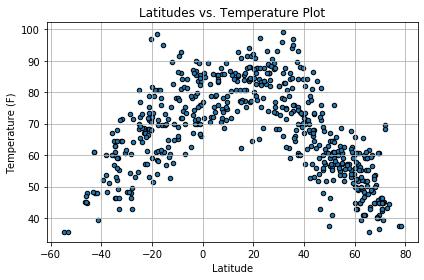

In [30]:
city_df.plot.scatter(x="Latitude", y="Temperature (F)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_temp.png")
# print plot
plt.show()

## Latitude vs. Humidity Plot

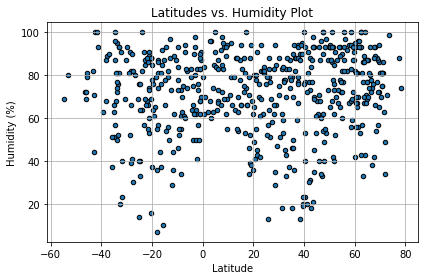

In [31]:
city_df.plot.scatter(x="Latitude", y="Humidity (%)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_humi.png")
# print plot
plt.show()

## Latitude vs. Cloudiness Plot

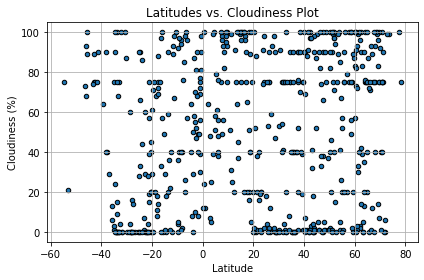

In [32]:
city_df.plot.scatter(x="Latitude", y="Cloudiness (%)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_cloud.png")
# print plot
plt.show()

## Latitude vs. Wind Speed Plot

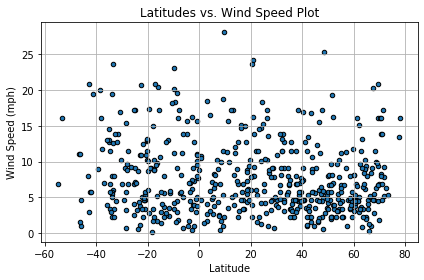

In [33]:
city_df.plot.scatter(x="Latitude", y="Wind Speed (mph)", marker="o", grid = True, edgecolor = "black")
# set title and labels
plt.title("Latitudes vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# save graph 
plt.tight_layout()
plt.savefig("Images/lat_vs_wind.png")
# print plot
plt.show()

## Linear Regression

In [34]:
# separate northern and southern hemisphere
northern_df = city_df.loc[city_df["Latitude"] >= 0]
southern_df = city_df.loc[city_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression